In [1]:
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn import linear_model,metrics


In [2]:
x=pd.read_csv(r"C:\Users\Admin\Downloads\2022_forbes_billionaires.csv")

In [3]:
x

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail


In [4]:
x.shape 

(2600, 7)

In [5]:
x.size

18200

In [6]:
x.tail()

,rank,name,networth,age,country,source,industry
2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail
2599,2578,Horst-Otto Gerberding,$1 B,69,Germany,flavors and fragrances,Food & Beverage


In [7]:
x.info() #it will show all the information part in your data frame part 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rank      2600 non-null   int64 
 1   name      2600 non-null   object
 2   networth  2600 non-null   object
 3   age       2600 non-null   int64 
 4   country   2600 non-null   object
 5   source    2600 non-null   object
 6   industry  2600 non-null   object
dtypes: int64(2), object(5)
memory usage: 142.3+ KB


In [8]:
x.head() #by using head command it will show starting five rows 

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [9]:
x.describe()

,rank,age
count,2600.000000,2600.000000
mean,1269.570769,64.271923
std,728.146364,13.220607
min,1.000000,19.000000
25%,637.000000,55.000000
50%,1292.000000,64.000000
75%,1929.000000,74.000000
max,2578.000000,100.000000


In [10]:
x.isnull()

,rank,name,networth,age,country,source,industry
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2595,False,False,False,False,False,False,False
2596,False,False,False,False,False,False,False
2597,False,False,False,False,False,False,False
2598,False,False,False,False,False,False,False


In [11]:
x.dropna()

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail


In [12]:
x.isna()

,rank,name,networth,age,country,source,industry
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2595,False,False,False,False,False,False,False
2596,False,False,False,False,False,False,False
2597,False,False,False,False,False,False,False
2598,False,False,False,False,False,False,False


In [13]:
x.isna().sum()

rank        0
name        0
networth    0
age         0
country     0
source      0
industry    0
dtype: int64

In [14]:
y=x.head(10)

In [15]:
y

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
5,6,Larry Page,$111 B,49,United States,Google,Technology
6,7,Sergey Brin,$107 B,48,United States,Google,Technology
7,8,Larry Ellison,$106 B,77,United States,software,Technology
8,9,Steve Ballmer,$91.4 B,66,United States,Microsoft,Technology
9,10,Mukesh Ambani,$90.7 B,64,India,diversified,Diversified


In [16]:
x.head

<bound method NDFrame.head of       rank                       name networth  age        country  \
0        1                 Elon Musk    $219 B   50  United States   
1        2                Jeff Bezos    $171 B   58  United States   
2        3  Bernard Arnault & family    $158 B   73         France   
3        4                Bill Gates    $129 B   66  United States   
4        5            Warren Buffett    $118 B   91  United States   
...    ...                        ...      ...  ...            ...   
2595  2578    Jorge Gallardo Ballart      $1 B   80          Spain   
2596  2578              Nari Genomal      $1 B   82    Philippines   
2597  2578            Ramesh Genomal      $1 B   71    Philippines   
2598  2578            Sunder Genomal      $1 B   68    Philippines   
2599  2578     Horst-Otto Gerberding      $1 B   69        Germany   

                      source                industry  
0              Tesla, SpaceX             Automotive   
1                  

In [17]:
pd.isnull(x)  #it will show all false value

,rank,name,networth,age,country,source,industry
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2595,False,False,False,False,False,False,False
2596,False,False,False,False,False,False,False
2597,False,False,False,False,False,False,False
2598,False,False,False,False,False,False,False


In [18]:
pd.isnull(x).sum() #it will check the null values #by using sum() method

rank        0
name        0
networth    0
age         0
country     0
source      0
industry    0
dtype: int64

In [19]:
x.shape

(2600, 7)

In [20]:
data_set=[['Elon Musk',50],['Jeff Bezos',58],['Bill Gates',66],['Warron Buffett',91]] #initalize or passing the list
x_test=pd.DataFrame(data_set,columns=['Name','Age']) #creating the data frame by using list

In [21]:
x_test

,Name,Age
0,Elon Musk,50
1,Jeff Bezos,58
2,Bill Gates,66
3,Warron Buffett,91


In [22]:
x_test.dropna(inplace=True)

In [23]:
x_test

,Name,Age
0,Elon Musk,50
1,Jeff Bezos,58
2,Bill Gates,66
3,Warron Buffett,91


In [24]:
x.columns #by using this command it will show the columns name 

Index(['rank', 'name', 'networth', 'age', 'country', 'source', 'industry'], dtype='object')

In [25]:
x.drop(['industry'],axis=1,inplace=True)

In [26]:
x

,rank,name,networth,age,country,source
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX"
1,2,Jeff Bezos,$171 B,58,United States,Amazon
2,3,Bernard Arnault & family,$158 B,73,France,LVMH
3,4,Bill Gates,$129 B,66,United States,Microsoft
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway
...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals
2596,2578,Nari Genomal,$1 B,82,Philippines,apparel
2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel
2598,2578,Sunder Genomal,$1 B,68,Philippines,garments


In [27]:
x.rename(columns={'source':'Global Source'}) #rename my columns name by using rename syntax

,rank,name,networth,age,country,Global Source
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX"
1,2,Jeff Bezos,$171 B,58,United States,Amazon
2,3,Bernard Arnault & family,$158 B,73,France,LVMH
3,4,Bill Gates,$129 B,66,United States,Microsoft
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway
...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals
2596,2578,Nari Genomal,$1 B,82,Philippines,apparel
2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel
2598,2578,Sunder Genomal,$1 B,68,Philippines,garments


In [28]:
x.describe() #describe syntax it will show the description in the data (i.e mean ,min, std)

,rank,age
count,2600.000000,2600.000000
mean,1269.570769,64.271923
std,728.146364,13.220607
min,1.000000,19.000000
25%,637.000000,55.000000
50%,1292.000000,64.000000
75%,1929.000000,74.000000
max,2578.000000,100.000000


In [29]:
x[['name','networth','source']].describe() #it will show the column name which are selected or which are pass the value

,name,networth,source
count,2600,2600,2600
unique,2598,228,895
top,Wang Yanqing & family,$1.5 B,real estate
freq,2,147,148


In [30]:
t=x.sample(10)

In [31]:
t

,rank,name,networth,age,country,source
2419,2324,Lucio Tan,$1.2 B,87,Philippines,diversified
1973,1929,Feng Yuxia,$1.5 B,57,China,pharmaceuticals
861,851,Aerin Lauder,$3.5 B,51,United States,cosmetics
1273,1238,Charles Munger,$2.5 B,98,United States,Berkshire Hathaway
591,586,Leng Youbin,$4.8 B,53,China,infant formula
1826,1818,Chen Shibin,$1.6 B,55,China,quartz products
1283,1238,Suh Kyung-bae,$2.5 B,59,South Korea,cosmetics
150,151,Ricardo Salinas Pliego & family,$12.4 B,66,Mexico,"retail, media"
1349,1341,Chu Lam Yiu,$2.3 B,52,Hong Kong,flavorings
286,284,Patrick Ryan,$8 B,84,United States,insurance


AttributeError: 'Axes' object has no attribute 'countainers'

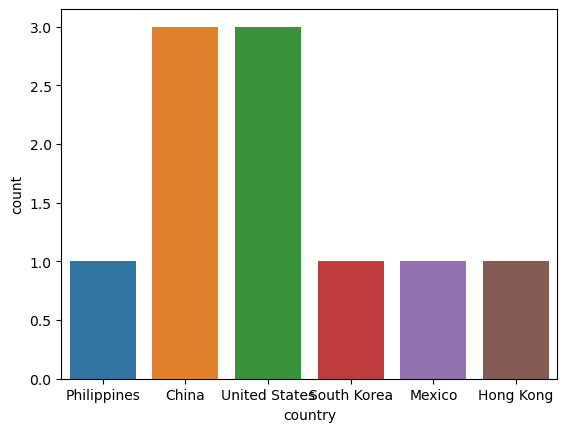

In [32]:
ab=sns.countplot(x='country',data=t)
for bars in ab.countainers:
    ab:bar_label(bars)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'France'),
  Text(3, 0, 'United States'),
  Text(4, 0, 'United States'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'United States'),
  Text(7, 0, 'United States'),
  Text(8, 0, 'United States'),
  Text(9, 0, 'India')])

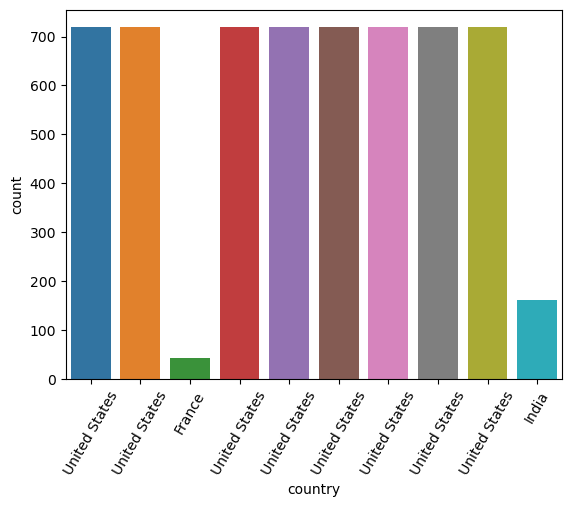

In [33]:
ab=sns.countplot(x='country',data=x, order=x.country.iloc[:10])
plt.xticks(rotation=60)

<Axes: >

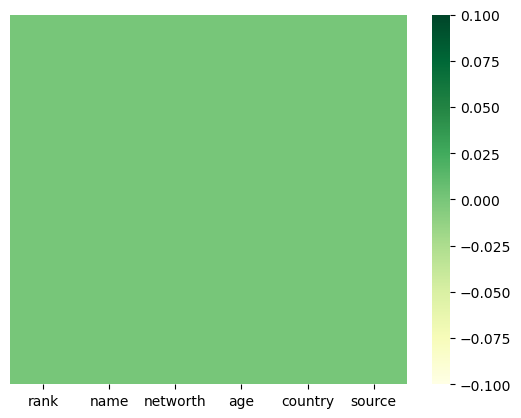

In [34]:
sns.heatmap(x.isnull(),yticklabels=False,cmap="YlGn")

<Axes: >

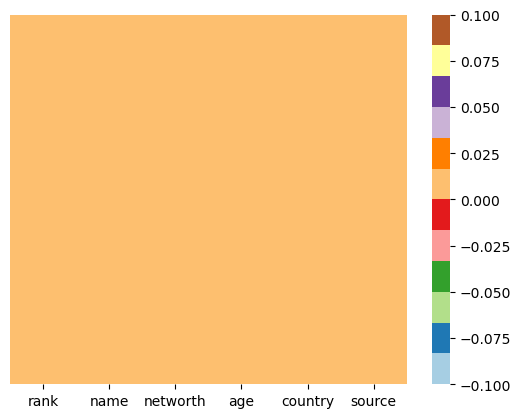

In [35]:
sns.heatmap(x.isnull(),yticklabels=False,cmap="Paired")

<Axes: xlabel='networth', ylabel='age'>

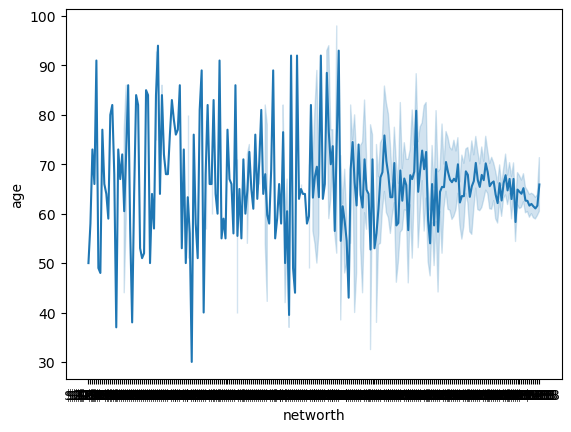

In [36]:
sns.lineplot(x=x.networth,y=x.age)

<Axes: xlabel='name', ylabel='source'>

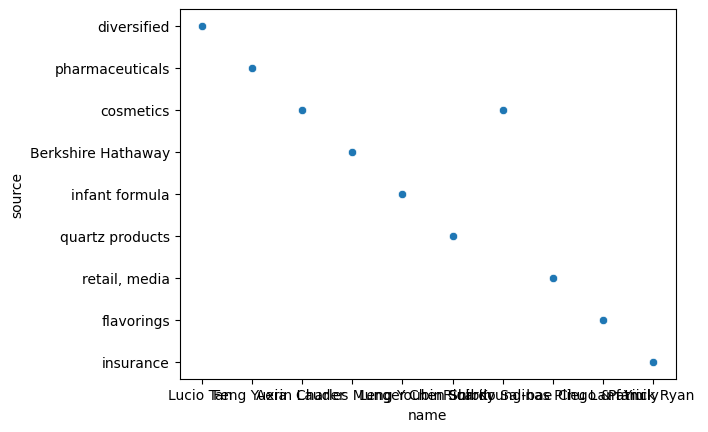

In [37]:
sns.scatterplot(x='name',y='source',data=t) #scatterplot

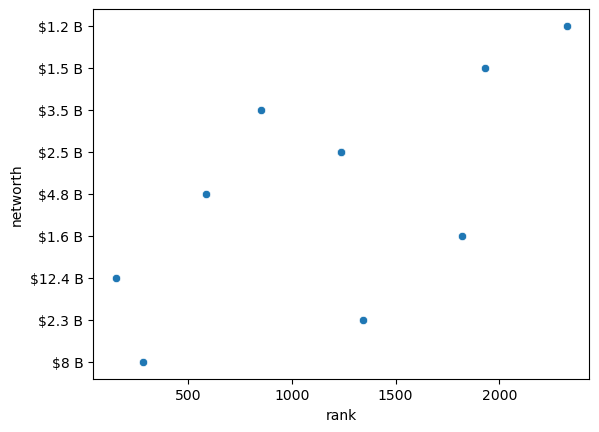

In [57]:
sns.scatterplot(x='rank',y='networth',data=t);

<Axes: >

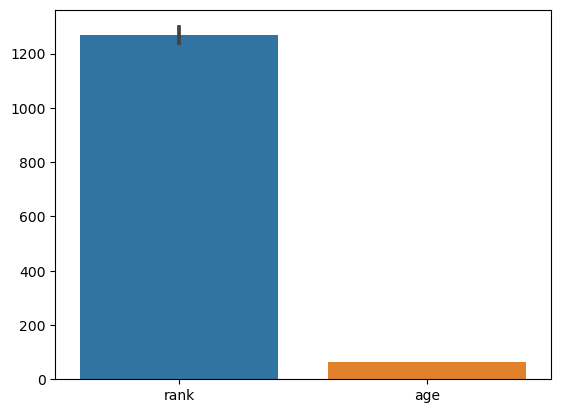

In [38]:
sns.barplot(x)

<Axes: xlabel='name', ylabel='age'>

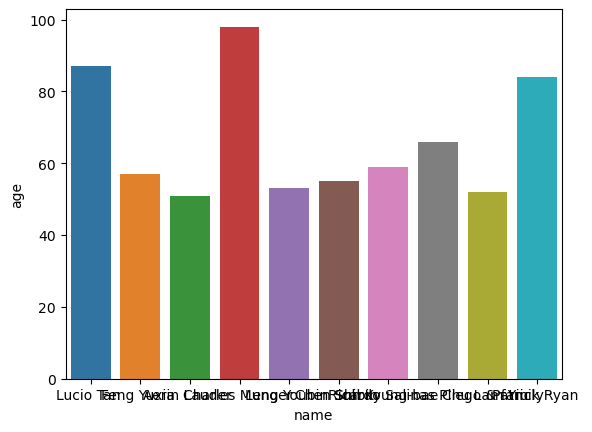

In [39]:
sns.barplot(x="name",y="age",data=t) 

<Axes: xlabel='name', ylabel='networth'>

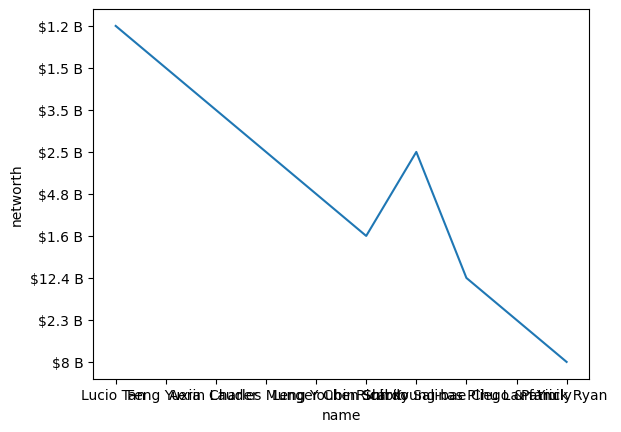

In [40]:
sns.lineplot(x=t.name,y=t.networth.iloc[:10])

<Axes: xlabel='name', ylabel='source'>

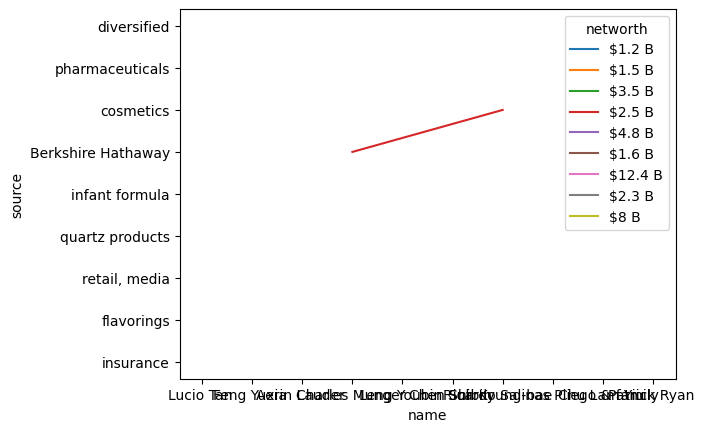

In [64]:
sns.lineplot(x=t.name,y=t.source,data=t,hue="networth")

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U13'), dtype('float64')) -> None

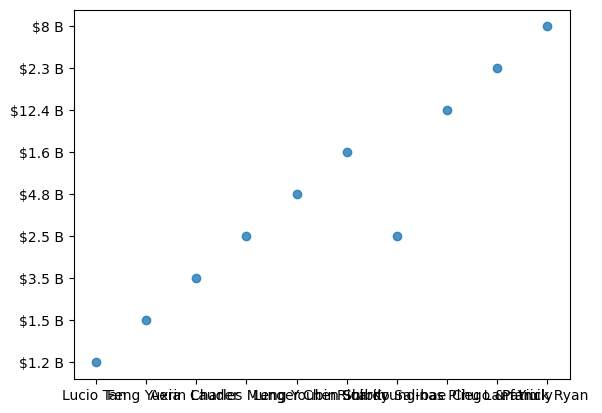

In [81]:
sns.regplot(x=t.name,y=t.networth,data=t)

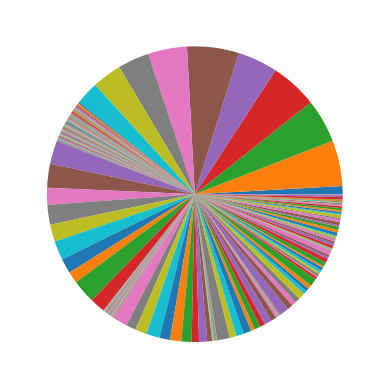

In [41]:
x=x.groupby('networth')['networth'].count()
plt.pie(x)
plt.show()

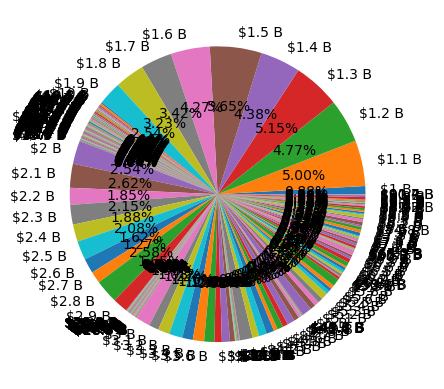

In [84]:
plt.pie(x,labels=x.index,autopct="%.2f%%")
plt.show()